
<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

In [373]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

In [374]:
df = pd.read_csv(
    "./datasets/data.csv", 
    sep=';', 
    decimal=',', 
    header=0,
    na_values='>>?<<'
)
df[0:7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.229301e+09,2014\10\13,231300.0,2.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6.414100e+09,2014\12\09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5.631500e+09,2015\02\25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2.487201e+09,2014\12\09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1.954401e+09,2015\02\18,NaN,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
5,7.237550e+09,2014\05\12,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930
6,1.321400e+09,2014\06\27,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819


In [375]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(21613, 21)
Итого: 21613 записи, 21 столбец (признак).


In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40 non-null     float64
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21612 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21608 non-null  float64
 6   sqft_lot       21609 non-null  float64
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  float64
 9   view           21607 non-null  float64
 10  condition      21607 non-null  float64
 11  grade          21607 non-null  float64
 12  sqft_above     21607 non-null  float64
 13  sqft_basement  21607 non-null  float64
 14  yr_built       21607 non-null  float64
 15  yr_renovated   21607 non-null  float64
 16  zipcode        21605 non-null  float64
 17  lat            21606 non-null  float64
 18  long  

In [377]:
df["price"] = pd.to_numeric(
    df["price"],
    errors='coerce'
)

In [378]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40 non-null     float64
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21612 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21608 non-null  float64
 6   sqft_lot       21609 non-null  float64
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  float64
 9   view           21607 non-null  float64
 10  condition      21607 non-null  float64
 11  grade          21607 non-null  float64
 12  sqft_above     21607 non-null  float64
 13  sqft_basement  21607 non-null  float64
 14  yr_built       21607 non-null  float64
 15  yr_renovated   21607 non-null  float64
 16  zipcode        21605 non-null  float64
 17  lat            21606 non-null  float64
 18  long  

In [379]:
print(f"Кол-во уникальных id={ pd.unique(df['id']).size } lat={pd.unique(df['lat']).size} long={pd.unique(df['long']).size} ")

Кол-во уникальных id=41 lat=5034 long=753 


In [380]:
df = df.drop (
    labels = ['id','lat', 'long' ], # список названий столбцов
    axis=1
    )
df[:2]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014\10\13,231300.0,2.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,1340.0,5650
1,2014\12\09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,1690.0,7639


In [381]:
df.isna().sum()

date             4
price            4
bedrooms         1
bathrooms        0
sqft_living      5
sqft_lot         4
floors           6
waterfront       6
view             6
condition        6
grade            6
sqft_above       6
sqft_basement    6
yr_built         6
yr_renovated     6
zipcode          8
sqft_living15    4
sqft_lot15       0
dtype: int64

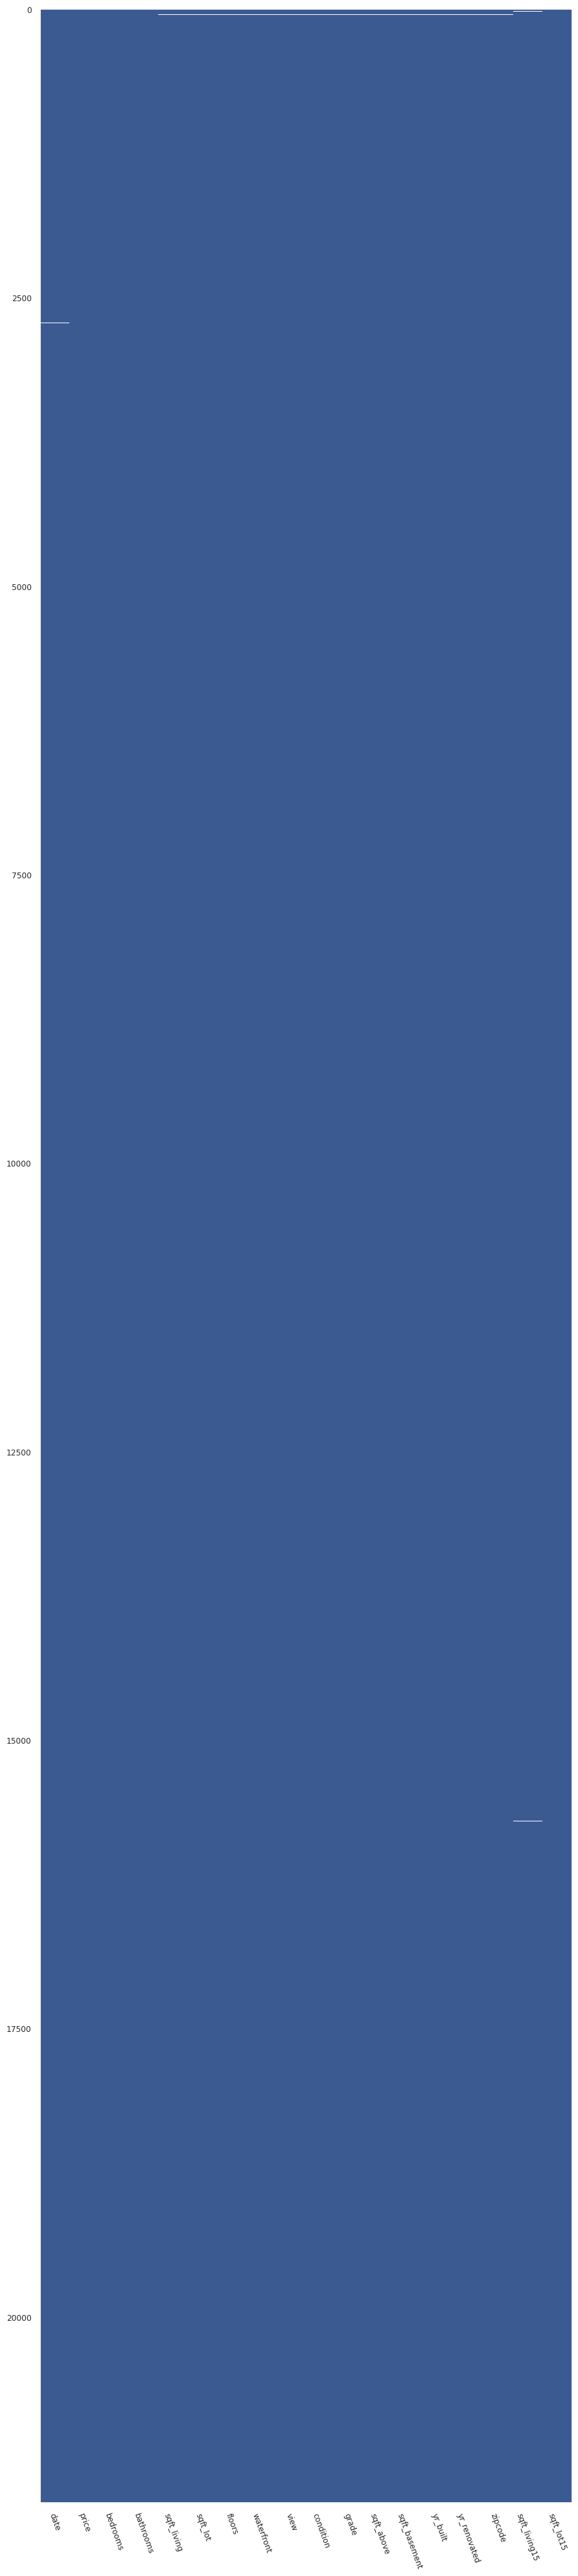

In [382]:
def showEmptyMap(data, ):
    fig, ax = plt.subplots( figsize=(len(data.columns) / 1.7, 50 ))
    plt.imshow( 
            df.isna(),
            cmap = ListedColormap([ '#3B5A92', 'white', ]),
            aspect='auto',
            interpolation= 'none'
        )
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=-70,)
    plt.grid(False)
showEmptyMap(df)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64


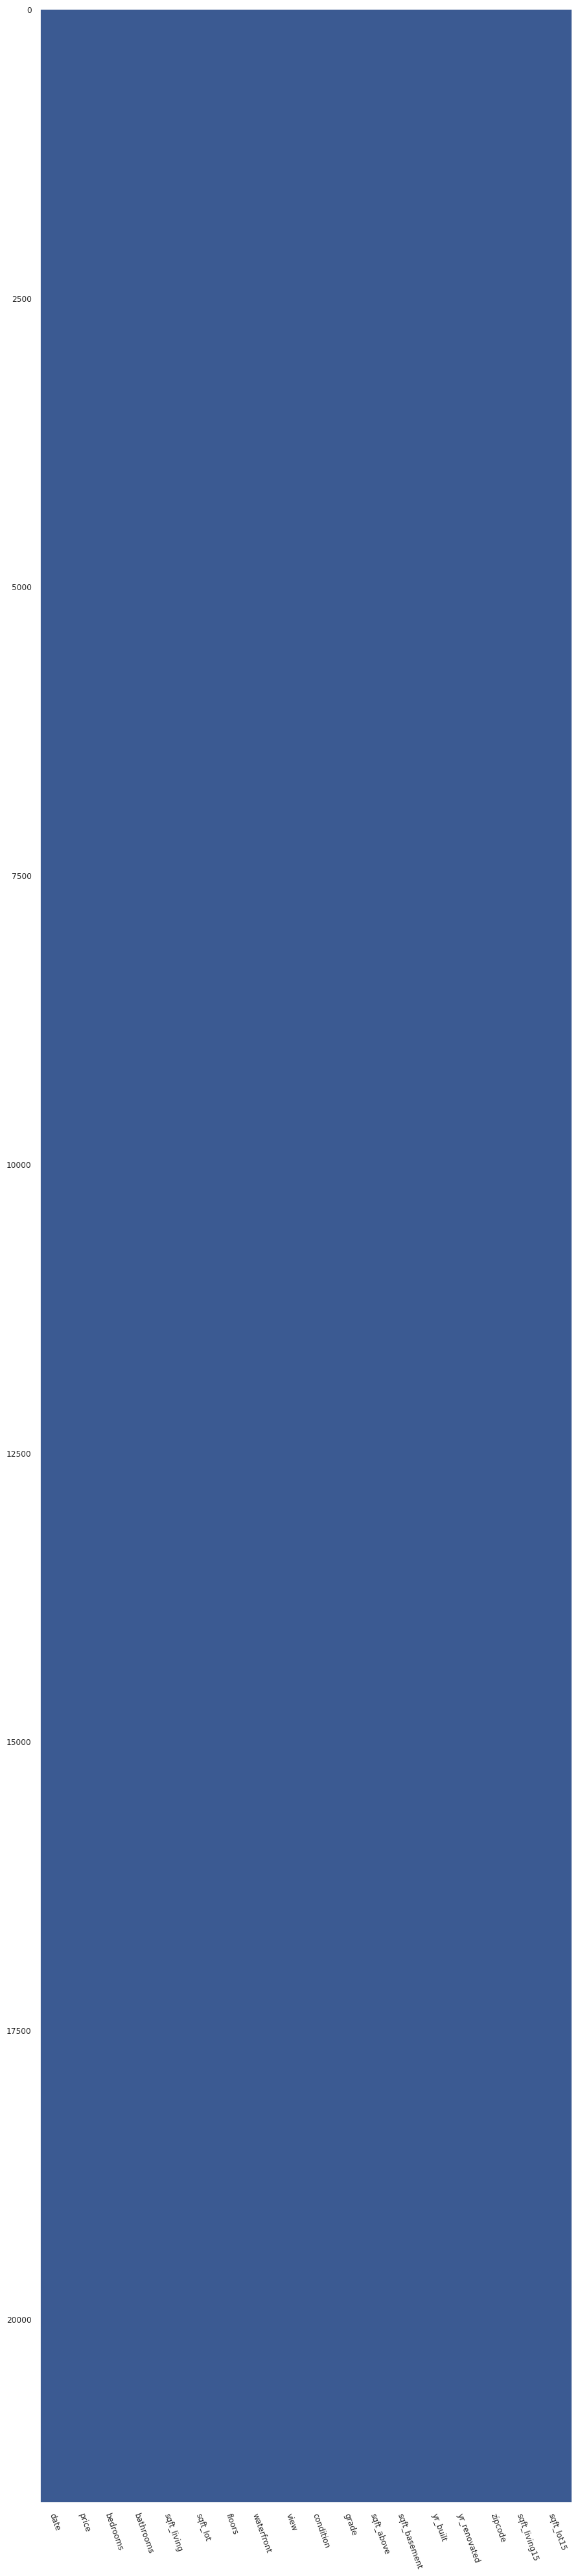

In [383]:
df = df.dropna(axis='index', how='any')
print (df.isna().sum())
showEmptyMap(df)

In [384]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
date,21593,372,2014\06\23,142


In [385]:
df['date'] = pd.to_datetime(
    df['date'],
    format='ISO8601'
)
df['date_dayofweek'] = df['date'].dt.day_of_week
df['date_day'] = df['date'].dt.day
df['date_month'] = df['date'].dt.month
df.info()
df[ ['date', 'date_month', 'date_day'] ][:3]

<class 'pandas.core.frame.DataFrame'>
Index: 21593 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21593 non-null  datetime64[ns]
 1   price           21593 non-null  float64       
 2   bedrooms        21593 non-null  float64       
 3   bathrooms       21593 non-null  float64       
 4   sqft_living     21593 non-null  float64       
 5   sqft_lot        21593 non-null  float64       
 6   floors          21593 non-null  float64       
 7   waterfront      21593 non-null  float64       
 8   view            21593 non-null  float64       
 9   condition       21593 non-null  float64       
 10  grade           21593 non-null  float64       
 11  sqft_above      21593 non-null  float64       
 12  sqft_basement   21593 non-null  float64       
 13  yr_built        21593 non-null  float64       
 14  yr_renovated    21593 non-null  float64       
 15  zipcode

,date,date_month,date_day
0,2014-10-13,10,13
1,2014-12-09,12,9
2,2015-02-25,2,25


In [386]:
#ненужный объект
df = df.drop (
    labels = ['date' ], # список названий столбцов
    axis=1
    )

corr_df = df.corr(method='pearson')

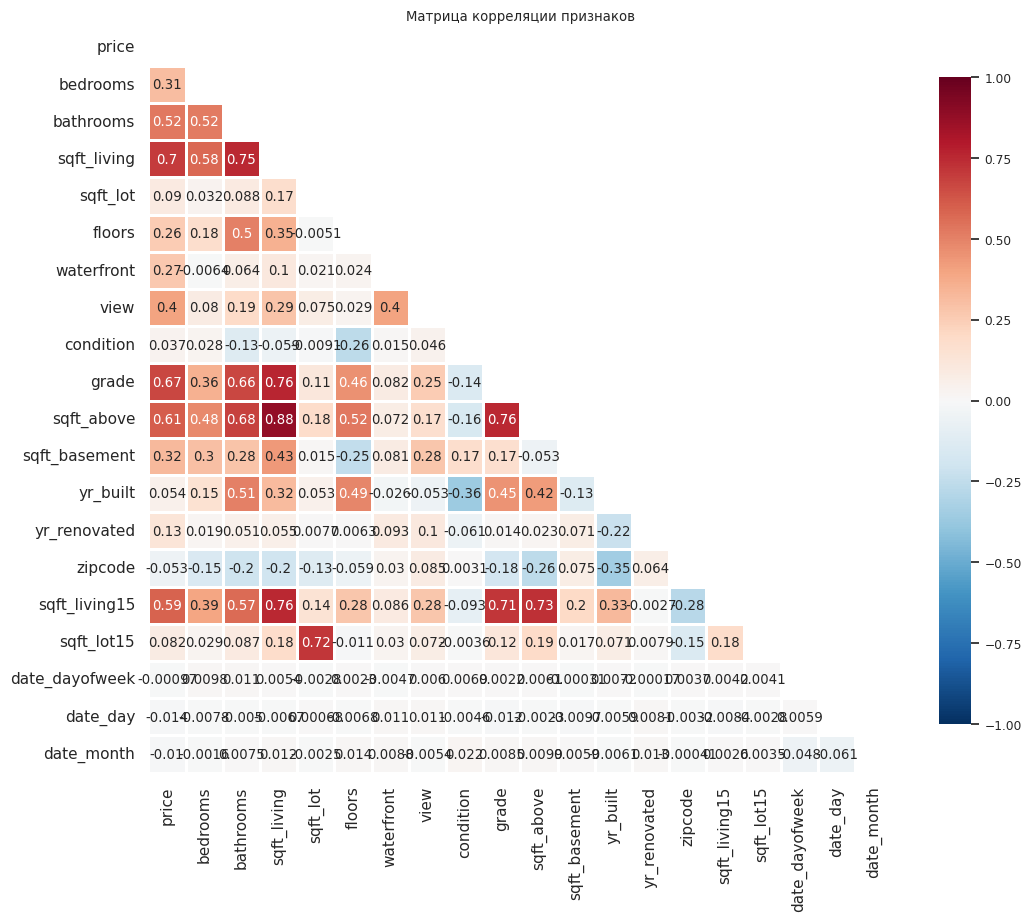

In [387]:
sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');

In [388]:
corr_df[["price"]].abs().sort_values('price')

,price
date_dayofweek,0.000969
date_month,0.010174
date_day,0.013727
condition,0.036646
zipcode,0.052814
yr_built,0.053603
sqft_lot15,0.082355
sqft_lot,0.089674
yr_renovated,0.127156
floors,0.257403


<Figure size 700x700 with 0 Axes>

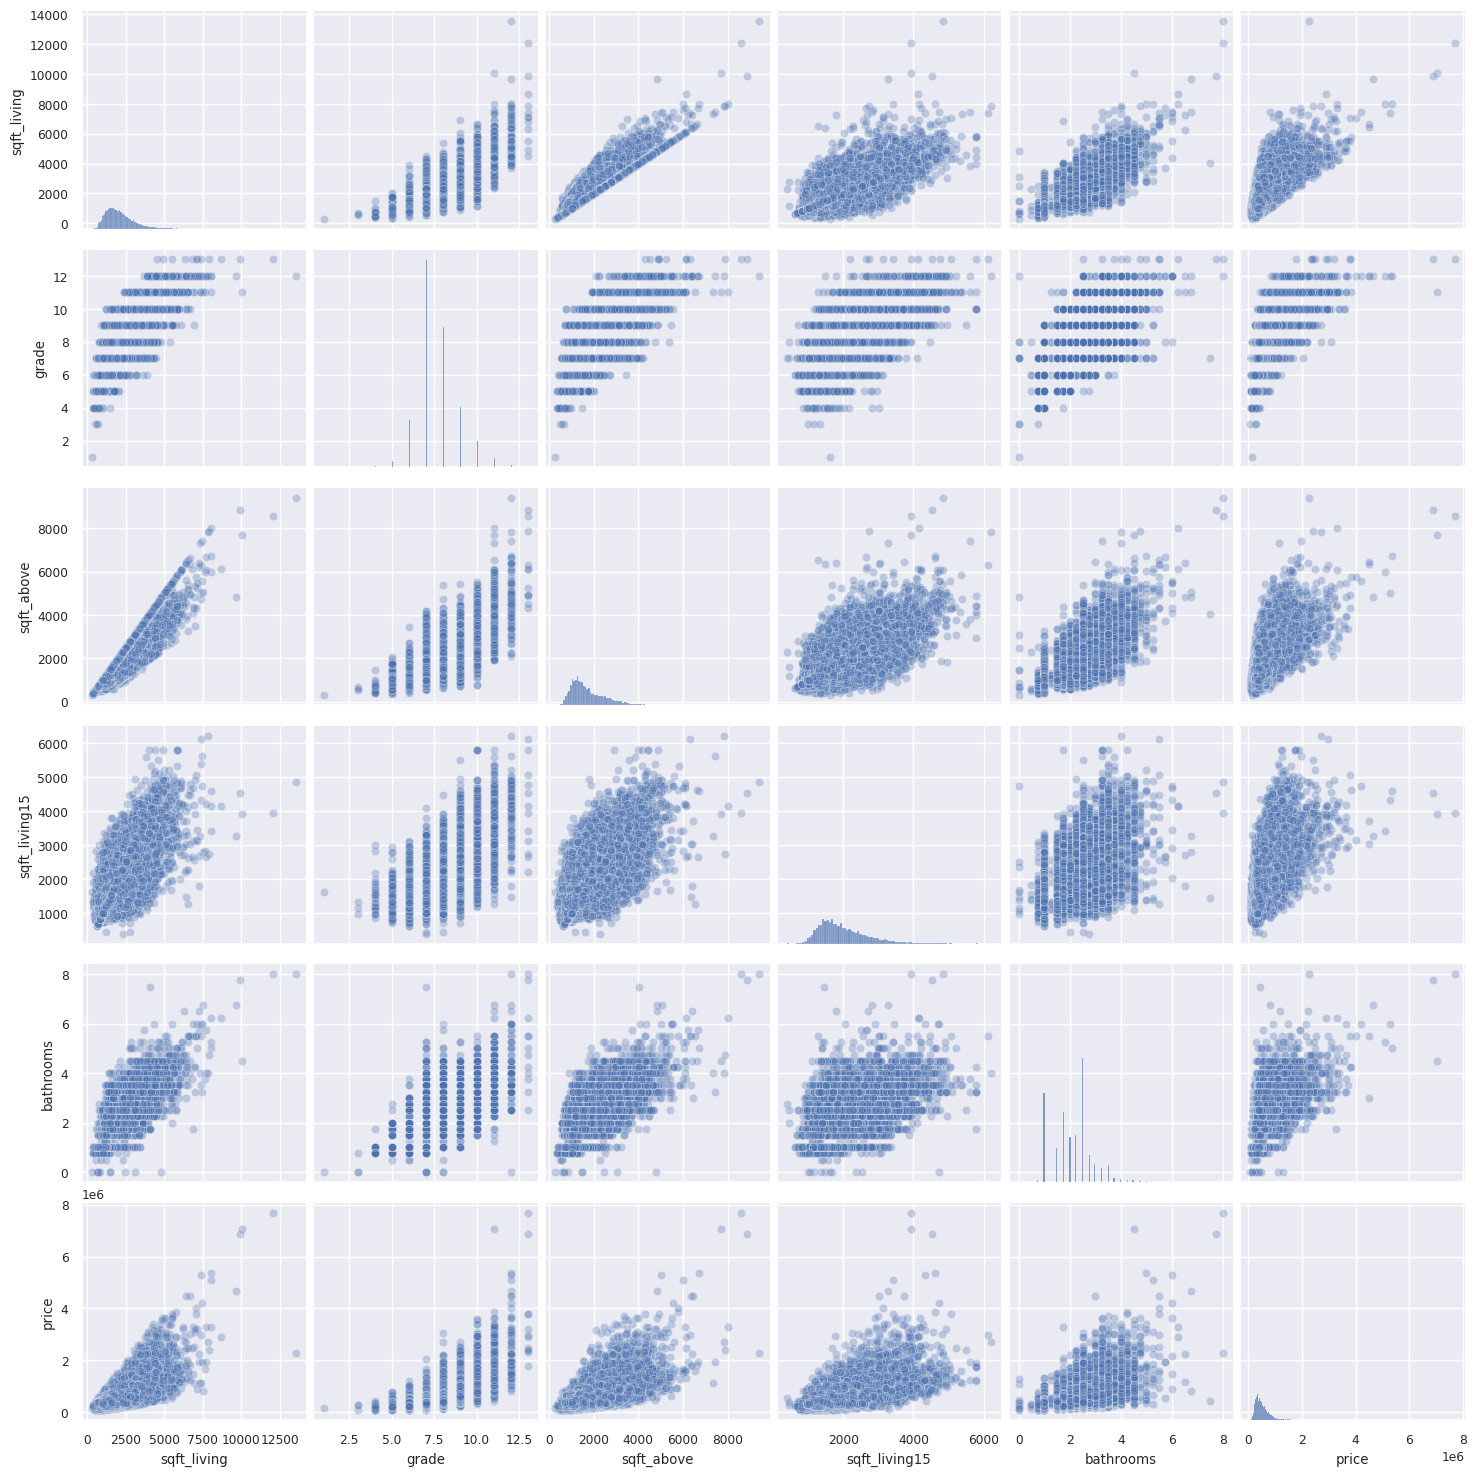

In [390]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
target = ['price']
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
)